### 카툰 필터 카메라

- 카툰 필터 카메라

   - 카메라 입력 영상에 실시간으로 재미있는 필터링 적용
  
  
- 구현 기능

   - 카툰 필터
   
      - 입력 영상의 색상 단순화 및 에지 부분 검정색 강조
     ![](https://images.velog.io/images/qsdcfd/post/509db345-d696-416b-b385-c483513611f4/image.png)
     
   
   - 스케치 필터
   
     - 평탄한 영역은 흰색
     
     - 에지 근방에서 어두운 영역을 검정으로 설정하고 밝은 영역은 흰색
   
   - 스페이스바 누를 때마다 모드 변경


#### CODE

In [ ]:
import sys
import numpy as np
import cv2


def cartoon_filter(img):
    h, w = img.shape[:2]
    img2 = cv2.resize(img, (w//2, h//2))

    blr = cv2.bilateralFilter(img2, -1, 20, 7)
    edge = 255 - cv2.Canny(img2, 80, 120)
    edge = cv2.cvtColor(edge, cv2.COLOR_GRAY2BGR)

    dst = cv2.bitwise_and(blr, edge)
    dst = cv2.resize(dst, (w, h), interpolation=cv2.INTER_NEAREST)

    return dst


def pencil_sketch(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blr = cv2.GaussianBlur(gray, (0, 0), 3)
    dst = cv2.divide(gray, blr, scale=255)
    return dst


cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print('video open failed!')
    sys.exit()

cam_mode = 0

while True:
    ret, frame = cap.read()

    if not ret:
        break

    if cam_mode == 1:
        frame = cartoon_filter(frame)
    elif cam_mode == 2:
        frame = pencil_sketch(frame)
        frame = cv2.cvtColor(frame, cv2.COLOR_GRAY2BGR)

    cv2.imshow('frame', frame)
    key = cv2.waitKey(1)

    if key == 27:
        break
    elif key == ord(' '):
        cam_mode += 1
        if cam_mode == 3:
            cam_mode = 0


cap.release()
cv2.destroyAllWindows()

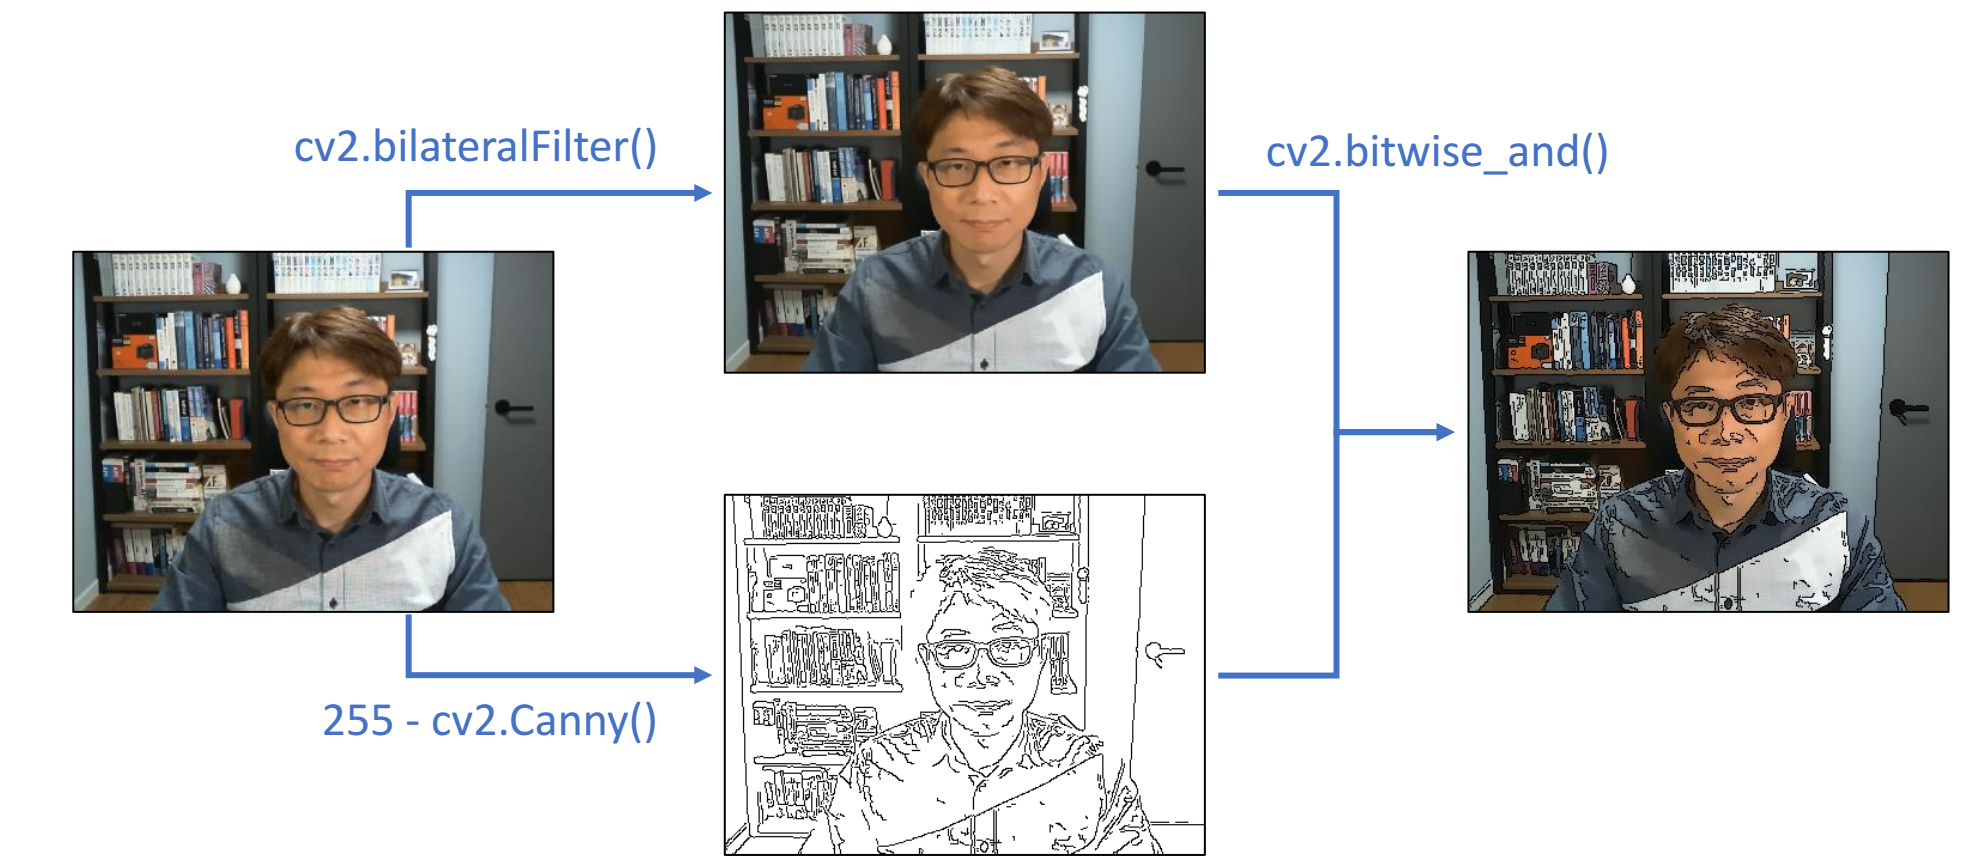